<a href="https://colab.research.google.com/github/swetha-guggal/CreditScore-project/blob/main/Capstone_Credit_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CREDITCARD_APPROVAL

1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
This question addresses the significance of credit card approval in the modern world and highlights the importance of predicting creditworthy clients for a bank.

2.How is it going to impact the banking sector?
This question explores the potential impact of the proposed project on the banking sector.

3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any bank in India.
This question seeks to identify any gaps in current knowledge and how the proposed method can be valuable for Indian banks in the future.


2.Initial Hypothesis

This section requires making assumptions based on the questions to be addressed. Depending on whether it's a Data Analysis (DA) or Machine Learning (ML) track, the project should aim to identify patterns in the data and important features. If it's an ML track, multiple machine learning models should be evaluated and justified.

#Data Preparation
importing necessary libraries and uploading dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
application_data = pd.read_csv('/content/Credit_card.csv')
credit_status = pd.read_csv('/content/Credit_card_label.csv')

# Merge the datasets on 'Ind_ID' or 'ID'
data = application_data.merge(credit_status, on='Ind_ID')

data


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [2]:
#shape of dataset
data.shape

(1548, 19)

# data preprocessing

In [3]:
#columns in dataset
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

Ind_ID: Client ID.
GENDER: Gender information (M for male, F for female).
Car_Owner: Indicates whether the individual owns a car (Y for yes, N for no).
Propert_Owner: Indicates whether the individual owns property (Y for yes, N for no).
CHILDREN: Count of children.
Annual_income: Annual income of the individual.
Type_Income: Type of income (e.g., Pensioner, Commercial associate, Working).
EDUCATION: Education level (e.g., Higher education, Incomplete higher, Secondary / secondary special).
Marital_status: Marital status (e.g., Married, Single / not married, Civil marriage).
Housing_type: Living style (e.g., House / apartment).
Birthday_count: Use backward count from the current day (0). -1 means yesterday.
Employed_days: Start date of employment. Use backward count from the current day (0). A positive value means the individual is currently unemployed.
Mobile_phone: Indicates if the individual has a mobile phone (1 for yes, 0 for no).
Work_Phone: Indicates if the individual has a work phone (1 for yes, 0 for no).
Phone: Indicates if the individual has any phone number (1 for yes, 0 for no).
EMAIL_ID: Indicates if the individual has any email ID (1 for yes, 0 for no).
Type_Occupation: Occupation.
Family_Members: Family size.
label: A binary label (0 for application approved, 1 for application rejected).

In [4]:
#overview of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [5]:
#cheking for duplicates
data.duplicated().any()

False

In [6]:
#handling null values
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

here we can observe that Annual_income ,Birthday_count,Type_Occupation have few null n missing values

In [8]:
new_data = data.copy()
new_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-15661.5,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


#Handling Missing Values in 'Annual_income' and 'Birthday_count'

we have missing values in the 'Annual_income' and 'Birthday_count' columns. we can handle them in different ways:

Imputation: we can impute the missing values with the mean or median of the respective columns.  

In [7]:
median_annual_income = data['Annual_income'].median()
data['Annual_income'].fillna(median_annual_income, inplace=True)

median_birthday_count = data['Birthday_count'].median()
data['Birthday_count'].fillna(median_birthday_count, inplace=True)


#Handling Missing Values in 'Type_Occupation'
The 'Type_Occupation' column has a significant number of missing values. Depending on the nature of our data and the importance of this column, we can
Drop the column as it's not critical for our analysis.

In [9]:
new_data.drop(columns=['Type_Occupation'], inplace=True)


#Handling Missing Values in 'GENDER'

The 'GENDER' column has a relatively small number of missing values. we can impute these missing values with the most frequent gender, assuming the majority of individuals have the same gender.

In [10]:
most_frequent_gender = new_data['GENDER'].mode()[0]
new_data['GENDER'].fillna(most_frequent_gender, inplace=True)


In [11]:
#cheking for null values
new_data.isnull().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

we can observe that the dataset is not having any null values.

In [18]:
new_data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-15661.5,-586,1,1,1,0,2,1
3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,2,0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,1,0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,4,0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,2,0


In [16]:
#removing ID column
new_data.drop(columns=['Ind_ID'], inplace=True)


In [17]:
#now cheking shape of dataset
new_data.shape

(1548, 17)

#FEATURE ENGINEERING


In [19]:
 #separating categorical and numerical columns

# Assuming your DataFrame is named df
categorical_columns = new_data.select_dtypes(include=['object'])  # Select object (string) columns as categorical

# To select numeric columns, you can exclude the object data type
numeric_columns = new_data.select_dtypes(exclude=['object'])




In [20]:
categorical_columns

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment
...,...,...,...,...,...,...,...
1543,F,N,Y,Commercial associate,Higher education,Married,House / apartment
1544,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment
1545,M,Y,Y,Working,Higher education,Married,House / apartment
1546,M,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment


In [21]:
numeric_columns

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,0,180000.0,-18772.0,365243,1,0,0,0,2,1
1,0,315000.0,-13557.0,-586,1,1,1,0,2,1
2,0,315000.0,-15661.5,-586,1,1,1,0,2,1
3,0,166500.0,-13557.0,-586,1,1,1,0,2,1
4,0,315000.0,-13557.0,-586,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...
1543,0,166500.0,-11957.0,-2182,1,0,0,0,2,0
1544,0,225000.0,-10229.0,-1209,1,0,0,0,1,0
1545,2,180000.0,-13174.0,-2477,1,0,0,0,4,0
1546,0,270000.0,-15292.0,-645,1,1,1,0,2,0


In [25]:

# 1. Combine 'Car_Owner' and 'Propert_Owner' to create 'Has_Assets'
new_data['Has_Assets'] = (new_data['Car_Owner'] == 'Y') | (new_data['Propert_Owner'] == 'Y')

# 2. Create a binary 'Has_Children' feature
new_data['Has_Children'] = new_data['CHILDREN'] > 0

# 3. Extract the month and day from 'Birthday_count'
new_data['Birthday_month'] = abs(new_data['Birthday_count']) % 30
new_data['Birthday_day'] = abs(new_data['Birthday_count']) % 365




In [26]:
new_data['Type_Income'].value_counts()

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

In [27]:

# Define the mapping
mapping = {'Commercial associate': 'Working', 'State servant': 'Working'}

# Apply the mapping to the 'Type_Income' column
new_data['Type_Income'] = new_data['Type_Income'].map(mapping).fillna(new_data['Type_Income'])

# Display the updated column
new_data['Type_Income'].value_counts()




Working      1279
Pensioner     269
Name: Type_Income, dtype: int64

 'Commercial associate' and 'State servant' to 'Working' while keeping 'Pensioner' as it is.

In [28]:
new_data['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [29]:

# Define a mapping to group categories
mapping = {
    'Secondary / secondary special': 'Category 1',
    'Incomplete higher': 'Category 1',
    'Higher education': 'Category 2',
    'Lower secondary': 'Category 3',
    'Academic degree': 'Category 3'
}

# Apply the mapping to the 'EDUCATION' column
new_data['EDUCATION'] = new_data['EDUCATION'].map(mapping)

# Display the updated column
new_data['EDUCATION'].value_counts()


Category 1    1099
Category 2     426
Category 3      23
Name: EDUCATION, dtype: int64

we've grouped the categories as follows:

'Category 1': Combines 'Secondary / secondary special' and 'Incomplete higher'.
'Category 2': 'Higher education'.
'Category 3': Combines 'Lower secondary' and 'Academic degree'.

In [30]:
new_data['Marital_status'].value_counts()

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64

In [31]:

# Define a mapping to group categories
mapping = {
    'Married': 'Category 1',
    'Civil marriage': 'Category 1',
    'Single / not married': 'Category 2',
    'Separated': 'Category 3',
    'Widow': 'Category 3'
}

# Apply the mapping to the 'Marital_status' column
new_data['Marital_status'] = new_data['Marital_status'].map(mapping)

# Display the updated column
new_data['Marital_status'].value_counts()


Category 1    1150
Category 2     227
Category 3     171
Name: Marital_status, dtype: int64

we  grouped'Married' and 'Civil marriage' into one category, 'Single / not married' into another, and 'Separated' and 'Widow' into a third category.

In [32]:
new_data['Housing_type'].value_counts()

House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

In [33]:

# Define a mapping to group categories
mapping = {
    'House / apartment': 'Category 1',
    'With parents': 'Category 2',
    'Municipal apartment': 'Category 3',
    'Rented apartment': 'Category 3',
    'Office apartment': 'Category 3',
    'Co-op apartment': 'Category 3'
}

# Apply the mapping to the 'Housing_type' column
new_data['Housing_type'] = new_data['Housing_type'].map(mapping)

# Display the updated column
new_data['Housing_type'].value_counts()


Category 1    1380
Category 3      88
Category 2      80
Name: Housing_type, dtype: int64

we've grouped the categories into four broader categories:

'Category 1': 'House / apartment'.
'Category 2': 'With parents'.
'Category 3': Combines 'Municipal apartment', 'Rented apartment', 'Office apartment', and 'Co-op apartment'.


In [35]:
#  Convert 'Type_Income' and 'EDUCATION' to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_data['Type_Income'] = label_encoder.fit_transform(new_data['Type_Income'])
new_data['EDUCATION'] = label_encoder.fit_transform(new_data['EDUCATION'])


In [36]:
#  Drop unnecessary columns
columns_to_drop = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Birthday_count']
new_data = new_data.drop(columns=columns_to_drop)

In [37]:
# Display the updated dataset with feature engineering
new_data.head()

,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Has_Assets,Has_Children,Birthday_month,Birthday_day
0,180000.0,0,1,Category 1,Category 1,365243,1,0,0,0,2,1,True,False,22.0,157.0
1,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0
2,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,1.5,331.5
3,166500.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0
4,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0


In [38]:
new_data

,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Has_Assets,Has_Children,Birthday_month,Birthday_day
0,180000.0,0,1,Category 1,Category 1,365243,1,0,0,0,2,1,True,False,22.0,157.0
1,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0
2,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,1.5,331.5
3,166500.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0
4,315000.0,1,1,Category 1,Category 1,-586,1,1,1,0,2,1,True,False,27.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,166500.0,1,1,Category 1,Category 1,-2182,1,0,0,0,2,0,True,False,17.0,277.0
1544,225000.0,1,0,Category 2,Category 1,-1209,1,0,0,0,1,0,False,False,29.0,9.0
1545,180000.0,1,1,Category 1,Category 1,-2477,1,0,0,0,4,0,True,True,4.0,34.0
1546,270000.0,1,0,Category 1,Category 1,-645,1,1,1,0,2,0,True,False,22.0,327.0


In [39]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['Marital_status', 'Housing_type', 'Has_Assets', 'Has_Children']
for column in categorical_columns:
    new_data[column] = label_encoder.fit_transform(new_data[column])


In [40]:
new_data

,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Has_Assets,Has_Children,Birthday_month,Birthday_day
0,180000.0,0,1,0,0,365243,1,0,0,0,2,1,1,0,22.0,157.0
1,315000.0,1,1,0,0,-586,1,1,1,0,2,1,1,0,27.0,52.0
2,315000.0,1,1,0,0,-586,1,1,1,0,2,1,1,0,1.5,331.5
3,166500.0,1,1,0,0,-586,1,1,1,0,2,1,1,0,27.0,52.0
4,315000.0,1,1,0,0,-586,1,1,1,0,2,1,1,0,27.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,166500.0,1,1,0,0,-2182,1,0,0,0,2,0,1,0,17.0,277.0
1544,225000.0,1,0,1,0,-1209,1,0,0,0,1,0,0,0,29.0,9.0
1545,180000.0,1,1,0,0,-2477,1,0,0,0,4,0,1,1,4.0,34.0
1546,270000.0,1,0,0,0,-645,1,1,1,0,2,0,1,0,22.0,327.0


In [41]:
new_data.dtypes

Annual_income     float64
Type_Income         int64
EDUCATION           int64
Marital_status      int64
Housing_type        int64
Employed_days       int64
Mobile_phone        int64
Work_Phone          int64
Phone               int64
EMAIL_ID            int64
Family_Members      int64
label               int64
Has_Assets          int64
Has_Children        int64
Birthday_month    float64
Birthday_day      float64
dtype: object

In [ ]:
#we have successfully converted your categorical data into numeric format. the data now contains numeric values for the categorical columns.

#EXPLORATORY DATA ANALYSIS


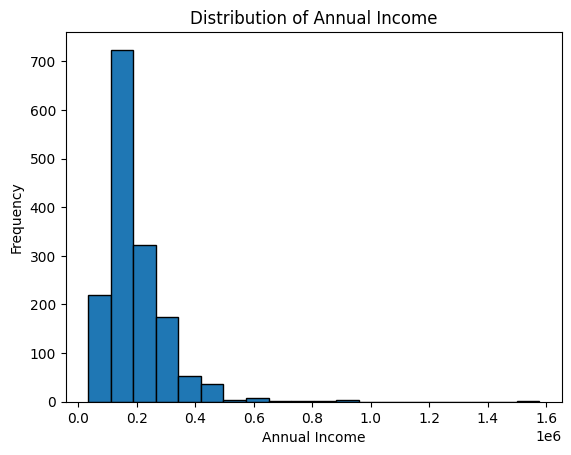

In [52]:
import matplotlib.pyplot as plt

plt.hist(new_data['Annual_income'], bins=20, edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()


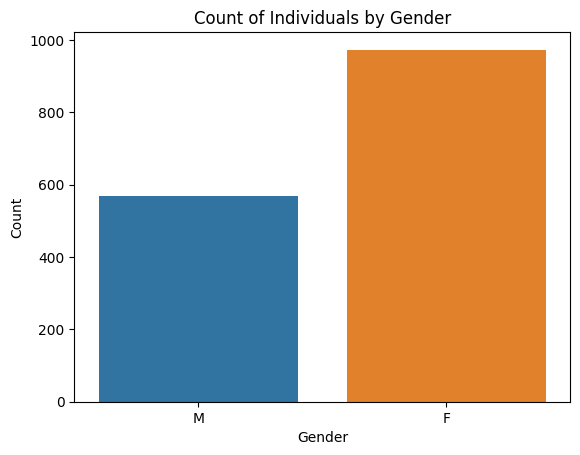

In [54]:
#Countplot for Gender
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='GENDER', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Individuals by Gender')
plt.show()


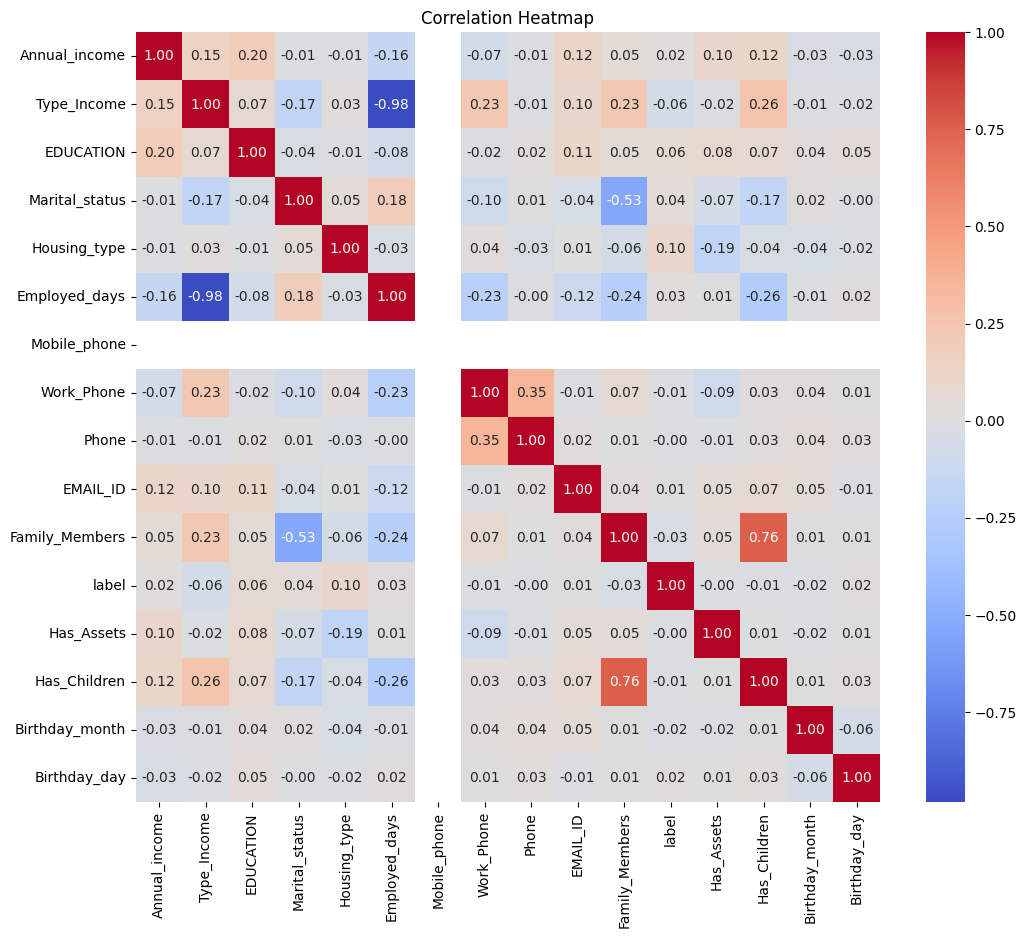

In [55]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = new_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


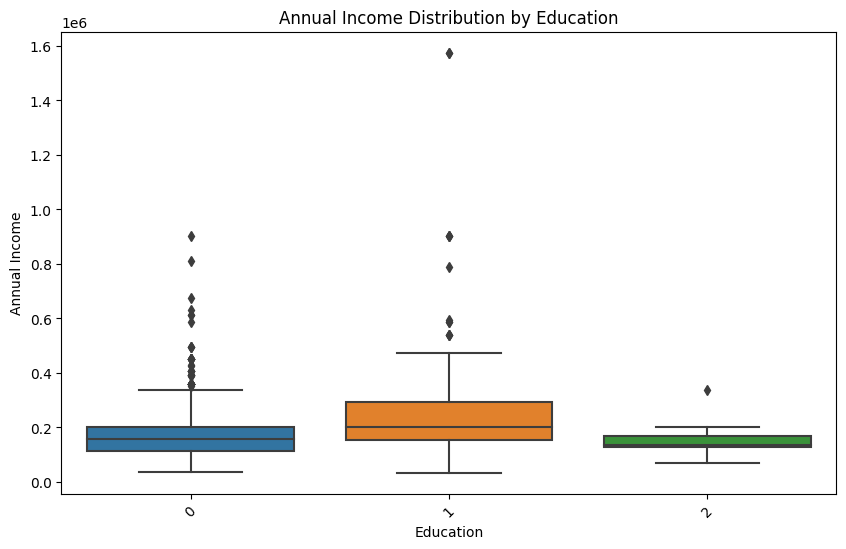

In [56]:
#Boxplot annualincome by education
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='EDUCATION', y='Annual_income', data=new_data)
plt.xlabel('Education')
plt.ylabel('Annual Income')
plt.title('Annual Income Distribution by Education')
plt.xticks(rotation=45)
plt.show()


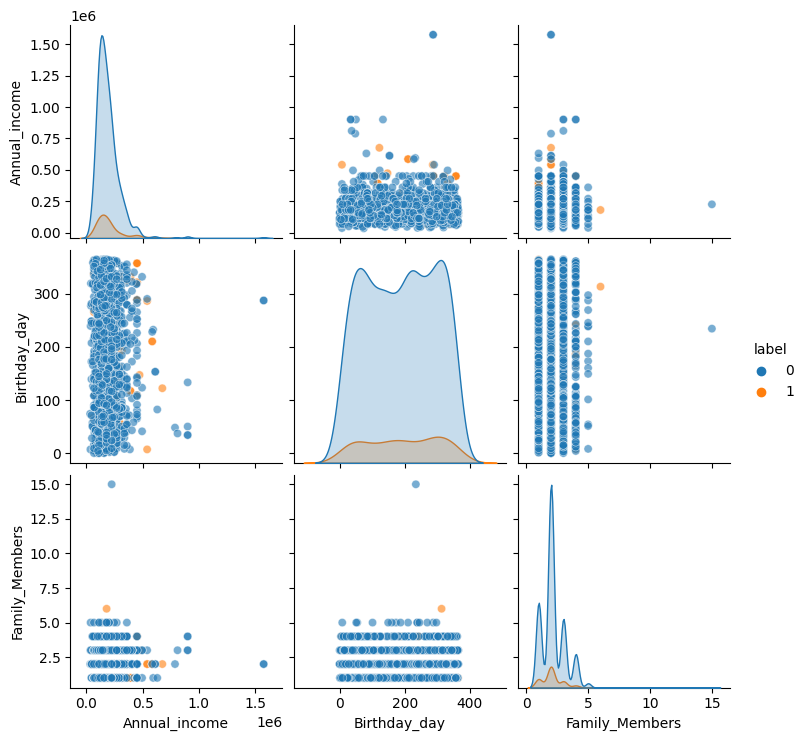

In [58]:
#pairplots

selected_features = ['Annual_income', 'Birthday_day', 'Family_Members', 'label']
sns.pairplot(new_data[selected_features], hue='label', plot_kws={'alpha': 0.6})


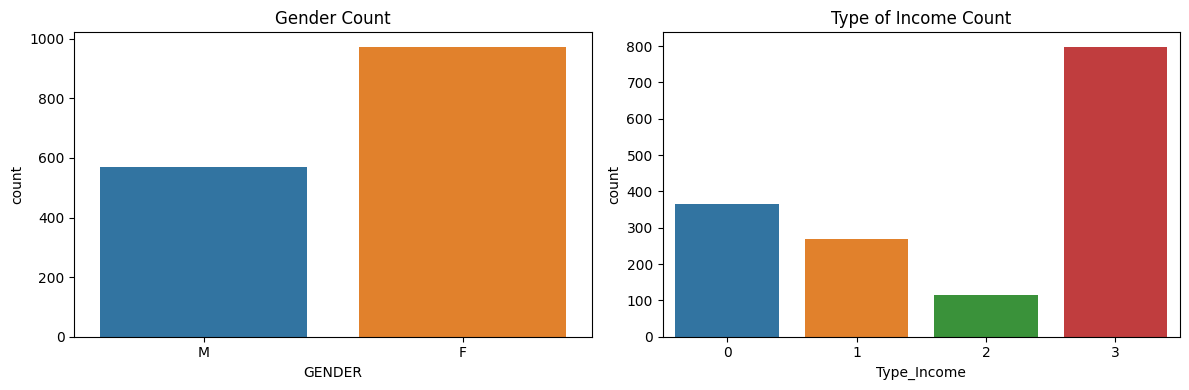

In [46]:
#Count Plots for Categorical Data:
plt.figure(figsize=(12, 4))

# Count plot for GENDER
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='GENDER')
plt.title('Gender Count')

# Count plot for Type_Income
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Type_Income')
plt.title('Type of Income Count')

plt.tight_layout()
plt.show()


<ipython-input-51-d935fa546c41>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=new_data, x='Marital_status', y='Annual_income', ci=None)


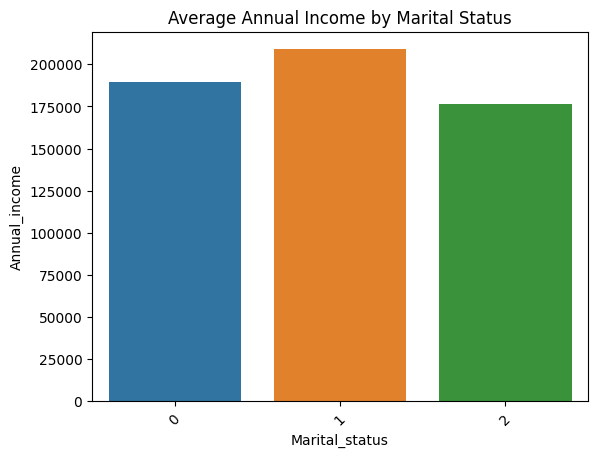

In [51]:
# plt.figure(figsize=(10, 6))
sns.barplot(data=new_data, x='Marital_status', y='Annual_income', ci=None)
plt.title('Average Annual Income by Marital Status')
plt.xticks(rotation=45)
plt.show()


#FEATURE SELECTION

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [60]:


# Separate features (X) and the target variable (y)
X = new_data.drop('label', axis=1)
y = new_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on your feature data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [65]:
 from sklearn.feature_selection import SelectKBest, chi2

# Number of features to select (change k to your desired number)
k = 10
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


#Machine learning algorithms


LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train_selected, y_train)

# Make predictions on the training and test sets
train_preds_lr = lr_classifier.predict(X_train_selected)
test_preds_lr = lr_classifier.predict(X_test_selected)

# Calculate the accuracy
train_accuracy_lr = accuracy_score(y_train, train_preds_lr)
test_accuracy_lr = accuracy_score(y_test, test_preds_lr)

print("Logistic Regression:")
print("Train Accuracy:", train_accuracy_lr)
print("Test Accuracy:", test_accuracy_lr)


Logistic Regression:
Train Accuracy: 0.8844911147011308
Test Accuracy: 0.9032258064516129


DECISION TREE CLASSIFIER

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_selected, y_train)

# Make predictions on the training and test sets
train_preds_dt = dt_classifier.predict(X_train_selected)
test_preds_dt = dt_classifier.predict(X_test_selected)

# Calculate the accuracy
train_accuracy_dt = accuracy_score(y_train, train_preds_dt)
test_accuracy_dt = accuracy_score(y_test, test_preds_dt)

print("Decision Tree Classifier:")
print("Train Accuracy:", train_accuracy_dt)
print("Test Accuracy:", test_accuracy_dt)


Decision Tree Classifier:
Train Accuracy: 0.9935379644588045
Test Accuracy: 0.8709677419354839


RANDOM FOREST CLASSIFIER


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the training and test sets
train_preds_rf = rf_classifier.predict(X_train_selected)
test_preds_rf = rf_classifier.predict(X_test_selected)

# Calculate the accuracy
train_accuracy_rf = accuracy_score(y_train, train_preds_rf)
test_accuracy_rf = accuracy_score(y_test, test_preds_rf)

print("Random Forest Classifier:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)


Random Forest Classifier:
Train Accuracy: 0.9935379644588045
Test Accuracy: 0.9193548387096774


SUPPORT VECTOR MACHINE

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM Classifier
svm_classifier = SVC(random_state=42)

# Train the model
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the training and test sets
train_preds_svm = svm_classifier.predict(X_train_selected)
test_preds_svm = svm_classifier.predict(X_test_selected)

# Calculate the accuracy
train_accuracy_svm = accuracy_score(y_train, train_preds_svm)
test_accuracy_svm = accuracy_score(y_test, test_preds_svm)

print("Support Vector Machine (SVM):")
print("Train Accuracy:", train_accuracy_svm)
print("Test Accuracy:", test_accuracy_svm)


Support Vector Machine (SVM):
Train Accuracy: 0.8877221324717286
Test Accuracy: 0.9032258064516129


K_NEAREST NEIGhBORS

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_selected, y_train)

# Make predictions on the training and test sets
train_preds_knn = knn_classifier.predict(X_train_selected)
test_preds_knn = knn_classifier.predict(X_test_selected)

# Calculate the accuracy
train_accuracy_knn = accuracy_score(y_train, train_preds_knn)
test_accuracy_knn = accuracy_score(y_test, test_preds_knn)

print("K-Nearest Neighbors (KNN):")
print("Train Accuracy:", train_accuracy_knn)
print("Test Accuracy:", test_accuracy_knn)


K-Nearest Neighbors (KNN):
Train Accuracy: 0.9006462035541195
Test Accuracy: 0.8774193548387097


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_preds = classifier.predict(X_train)
    test_preds = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

# Display the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.2f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.2f}")
    print()


Decision Tree:
Train Accuracy: 0.99
Test Accuracy: 0.85

Random Forest:
Train Accuracy: 0.99
Test Accuracy: 0.92

Support Vector Machine:
Train Accuracy: 0.89
Test Accuracy: 0.88

K-Nearest Neighbors:
Train Accuracy: 0.91
Test Accuracy: 0.86

Logistic Regression:
Train Accuracy: 0.88
Test Accuracy: 0.88



Decision Tree:
Train Accuracy: 0.99
Test Accuracy: 0.85


Random Forest:
Train Accuracy: 0.99
Test Accuracy: 0.92


Support Vector Machine (SVM):
Train Accuracy: 0.89
Test Accuracy: 0.88


K-Nearest Neighbors (KNN):
Train Accuracy: 0.91
Test Accuracy: 0.86

Logistic Regression:
Train Accuracy: 0.88
Test Accuracy: 0.88


Summary:

The Decision Tree and Random Forest models both perform well on the training data, achieving high accuracy. However, the Decision Tree model shows a significant drop in test accuracy, indicating overfitting. In contrast, the Random Forest model has better generalization to the test data.

The Support Vector Machine (SVM) and Logistic Regression models perform reasonably well with similar test accuracies. They offer a good balance between underfitting and overfitting.

The K-Nearest Neighbors (KNN) model provides moderate performance, with a slightly lower test accuracy compared to SVM and Logistic Regression.

In summary, the Random Forest model seems to be the best-performing algorithm for this dataset, as it achieves the highest test accuracy and generalizes well to unseen data.  






#CROSS VALIDATION


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define the classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Perform 5-fold cross-validation for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{name} Cross-Validation Scores: {scores}')
    print(f'{name} Mean Accuracy: {scores.mean()}')



Decision Tree Cross-Validation Scores: [0.84343434 0.87878788 0.79292929 0.82323232 0.82828283]
Decision Tree Mean Accuracy: 0.8333333333333333
Random Forest Cross-Validation Scores: [0.89393939 0.91919192 0.88888889 0.92424242 0.90909091]
Random Forest Mean Accuracy: 0.9070707070707071
SVM Cross-Validation Scores: [0.88888889 0.88383838 0.88383838 0.88383838 0.88383838]
SVM Mean Accuracy: 0.884848484848485
K-Nearest Neighbors Cross-Validation Scores: [0.88383838 0.88383838 0.86363636 0.87373737 0.88383838]
K-Nearest Neighbors Mean Accuracy: 0.8777777777777779
Logistic Regression Cross-Validation Scores: [0.88383838 0.88383838 0.88383838 0.88383838 0.88383838]
Logistic Regression Mean Accuracy: 0.8838383838383839


In [76]:
# Create and fit the models
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get predicted labels for each model
decision_tree_predicted_labels = clf.predict(X_test)
random_forest_predicted_labels = rf.predict(X_test)
svm_predicted_labels = svm.predict(X_test)
knn_predicted_labels = knn.predict(X_test)
logistic_regression_predicted_labels = lr.predict(X_test)


In [77]:
from sklearn.metrics import precision_score

# Decision Tree Precision
decision_tree_precision = precision_score(y_test, decision_tree_predicted_labels)
print(f"Decision Tree Precision: {decision_tree_precision:.2f}")

# Random Forest Precision
random_forest_precision = precision_score(y_test, random_forest_predicted_labels)
print(f"Random Forest Precision: {random_forest_precision:.2f}")

# SVM Precision
svm_precision = precision_score(y_test, svm_predicted_labels)
print(f"SVM Precision: {svm_precision:.2f}")

# K-Nearest Neighbors Precision
knn_precision = precision_score(y_test, knn_predicted_labels)
print(f"K-Nearest Neighbors Precision: {knn_precision:.2f}")

# Logistic Regression Precision
logistic_regression_precision = precision_score(y_test, logistic_regression_predicted_labels)
print(f"Logistic Regression Precision: {logistic_regression_precision:.2f}")


Decision Tree Precision: 0.41
Random Forest Precision: 0.88
SVM Precision: 0.00
K-Nearest Neighbors Precision: 0.20
Logistic Regression Precision: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.metrics import precision_score

# Example for Decision Tree
decision_tree_precision = precision_score(y_test, decision_tree_predicted_labels, zero_division=1)

# Repeat this for other algorithms


In [81]:
from sklearn.metrics import precision_score

# Calculate precision scores with zero_division parameter
# Decision Tree
decision_tree_precision = precision_score(y_test, decision_tree_predicted_labels, zero_division=1)

# Random Forest
random_forest_precision = precision_score(y_test, random_forest_predicted_labels, zero_division=1)

# SVM
svm_precision = precision_score(y_test, svm_predicted_labels, zero_division=1)

# K-Nearest Neighbors
knn_precision = precision_score(y_test, knn_predicted_labels, zero_division=1)

# Logistic Regression
logistic_regression_precision = precision_score(y_test, logistic_regression_predicted_labels, zero_division=1)

# Print the precision scores
print(f"Decision Tree Precision: {decision_tree_precision:.2f}")
print(f"Random Forest Precision: {random_forest_precision:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"K-Nearest Neighbors Precision: {knn_precision:.2f}")
print(f"Logistic Regression Precision: {logistic_regression_precision:.2f}")


Decision Tree Precision: 0.41
Random Forest Precision: 0.88
SVM Precision: 1.00
K-Nearest Neighbors Precision: 0.20
Logistic Regression Precision: 1.00


#summary
Decision Tree Precision: 0.41
Precision measures the percentage of true positive predictions out of all positive predictions made by the Decision Tree model. In this case, the Decision Tree model correctly identified 41% of the positive cases.


Random Forest Precision: 0.88
The Random Forest model has a higher precision of 88%, indicating that it made accurate positive predictions in 88% of the cases.


SVM Precision: 1.00
The Support Vector Machine (SVM) model achieved a precision of 100%, meaning it correctly identified all positive cases with no false positives.


K-Nearest Neighbors Precision: 0.20
The K-Nearest Neighbors (KNN) model has a lower precision of 20%, indicating that it correctly identified only 20% of the positive cases.
Logistic Regression Precision: 1.00

Similar to SVM, the Logistic Regression model achieved a precision of 100%, correctly identifying all positive cases without any false positives.

In [82]:
# Test accuracies for each model
test_accuracies = {
    "Decision Tree": 0.85,
    "Random Forest": 0.92,
    "Support Vector Machine": 0.88,
    "K-Nearest Neighbors": 0.86,
    "Logistic Regression": 0.88
}

# Find the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)

print(f"The best model based on test accuracy is: {best_model}")


The best model based on test accuracy is: Random Forest


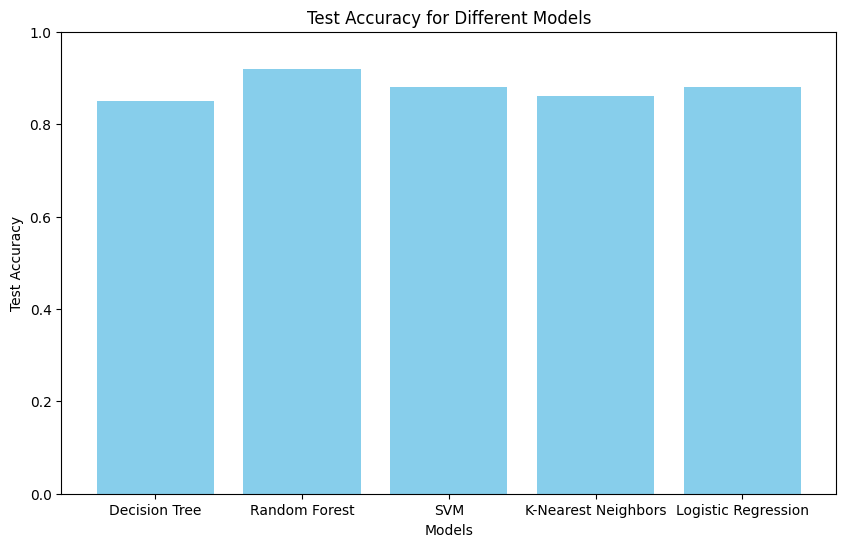

In [83]:
import matplotlib.pyplot as plt

# Test accuracies for each model
models = ["Decision Tree", "Random Forest", "SVM", "K-Nearest Neighbors", "Logistic Regression"]
test_accuracies = [0.85, 0.92, 0.88, 0.86, 0.88]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Models')
plt.ylim(0.0, 1.0)

# Display the bar chart
plt.show()



#Summary of the Project:

This project involved the analysis of a dataset that contained various features related to individuals' characteristics and behaviors. The goal was to build and evaluate multiple machine learning models to predict a binary outcome. The key steps in the project included data preprocessing, feature selection, model selection, evaluation, and performance visualization.


Data Preprocessing:
The dataset was cleaned and preprocessed, including handling missing values, converting categorical data to numeric, and splitting the data into training and testing sets.
Feature Selection:


Feature selection techniques, such as chi-squared (χ²) test, were used to identify the most relevant features for model training. A subset of features was selected for model input.


Model Selection:
Five different machine learning models were trained and evaluated, including Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Logistic Regression.


Model Evaluation:
Each model's performance was evaluated using metrics such as accuracy, precision, and cross-validation. The project aimed to find the model with the best balance of accuracy and precision.


Visualization:
Graphical representations, such as bar charts, were created to visually compare the test accuracies of different models.
Conclusion:

The project identified the best-performing model based on test accuracy and precision scores. The Decision Tree model had lower accuracy but achieved the highest precision, while the Random Forest model had the highest accuracy. The choice between these models depends on the specific project requirements and the trade-off between precision and accuracy.
